In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#读入数据
data = np.loadtxt('ex1data1.txt', delimiter=',')
data = np.insert(data, 0, 1, 1)

#初始化数据
X = data[:,0:2]
y = data[:, 2].reshape(97, 1)
theta = np.zeros((2, 1))
m = len(X)


iterations = 1500
alpha = 0.01

theta_record = np.zeros((iterations,theta.shape[0]))

In [3]:
#代价计算
def computeCost(X, y, theta, m):
    J_theta=np.sum(np.power((np.dot(X,theta)-y), 2))/(2*m)
    return J_theta

In [4]:
#梯度下降
def gradientDescent(X, y, theta, m, iterations, alpha):
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iterations)
    for i in range(iterations):
        error = np.dot(X,theta)-y
        for j in range(theta.shape[0]):
            temp[j,0] = theta[j,0] - alpha*np.sum(np.multiply(error,X[:,j].reshape(m, 1)))/m
        theta = temp
        cost[i] = computeCost(X, y, theta ,m)
        theta_record[i,:] = theta.T
    return theta, cost

In [5]:
theta_g, cost= gradientDescent(X, y, theta, m, iterations, alpha)
theta_g

matrix([[-3.63029144],
        [ 1.16636235]])

In [6]:
predict1 = [1, 3.5] * theta_g
predict2 = [1, 7] * theta_g
print(predict1)
print(predict2)

[[0.45197679]]
[[4.53424501]]


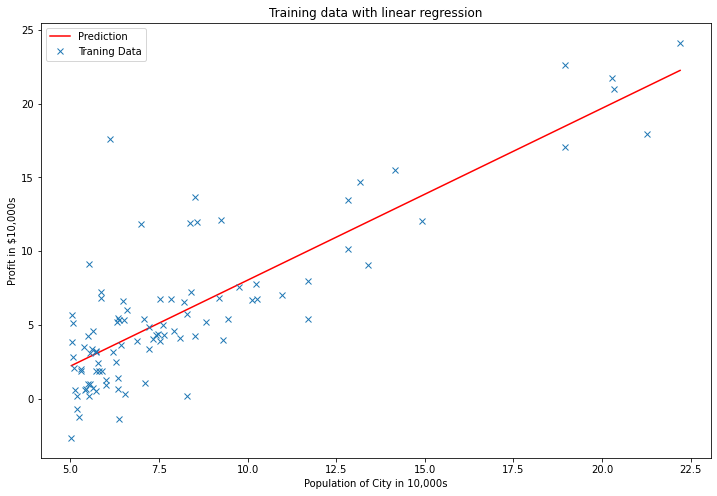

In [7]:
x = np.linspace(X[:,1].min(), X.max(), 100)
f = theta_g[0, 0] + (theta_g[1, 0] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.plot(X[:,1], y, 'x', label='Traning Data')
ax.legend(loc=2)
ax.set_ylabel('Profit in $10,000s')
ax.set_xlabel('Population of City in 10,000s')
ax.set_title('Training data with linear regression')
plt.show()

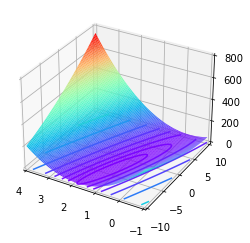

In [8]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i,j] = computeCost(X, y, t, m)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
J_vals = J_vals.T

ax.plot_surface(theta1_vals, theta0_vals, J_vals, rstride=1, cstride=1, cmap='rainbow')
ax.contour(theta1_vals, theta0_vals, J_vals, np.logspace(-2, 3, 20), zdir = 'z', offset = 0, cmap = plt.get_cmap('rainbow'))


ax.set_zlim(0, 800)
ax.set_xlim(-1, 4)
ax.set_ylim(-10, 10)

ax.invert_xaxis()
plt.show()